# Introdaction to neural network classification with Tensorflow

In this notebook we are going to learn how to write neural networks for classification.

A calssification is where you try to classify somthing as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

# Creating data to view and fit

In [3]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_sample = 1000

# Creating circles
X,y = make_circles(n_samples=n_sample, noise=0.03, random_state=42)

In [9]:
# Check features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [5]:
# Check label
y[:10]


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [6]:
import pandas as pd
df = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "label": y})
df

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


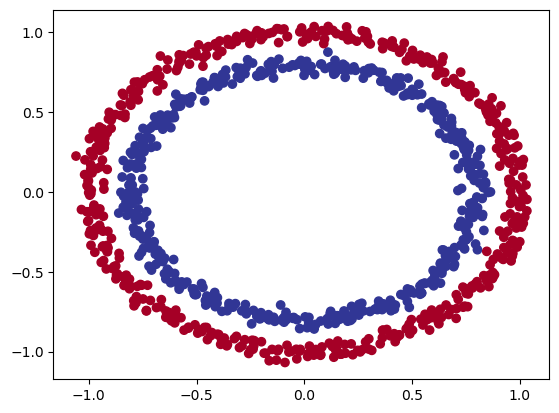

In [10]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

# Steps in modeling
### The steps in modeling with tensorflow are typically:
1. Create or import model
2. Compile model
3. fit the model
4. Evaluate the model
5. Tweak
6. Evaluate..

In [13]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [14]:
tf.config.set_visible_devices([],'GPU')

In [19]:
tf.random.set_seed(42)

model_1 = Sequential()

model_1.add(Dense(1))

model_1.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [20]:
model_1.fit(X,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 442us/step - loss: 4.2952 - accuracy: 0.4600
Epoch 2/5
 1/32 [..............................] - ETA: 0s - loss: 4.8541 - accuracy: 0.4375

2023-05-28 21:35:58.735370: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1682af010 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-05-28 21:35:58.735383: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Host, Default Version
2023-05-28 21:35:58.758984: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-28 21:35:58.915090: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 [==============================] - 0s 442us/step - loss: 4.2689 - accuracy: 0.4640
Epoch 3/5
32/32 [==============================] - 0s 460us/step - loss: 4.2417 - accuracy: 0.4640
Epoch 4/5
32/32 [==============================] - 0s 381us/step - loss: 4.1821 - accuracy: 0.4640
Epoch 5/5
32/32 [==============================] - 0s 395us/step - loss: 4.1117 - accuracy: 0.4660


In [30]:
X.shape

(1000, 2)

In [31]:
tf.random.set_seed(42)

model_2 = Sequential()

model_2.add(Dense(2, activation='relu'))
model_2.add(Dense(1, ))

model_2.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

model_2.fit(X,y, epochs=200, verbose=0)
model_2.evaluate(X,y)

32/32 [==============================] - 0s 447us/step - loss: 0.6839 - accuracy: 0.5540


[0.6839041113853455, 0.5540000200271606]

In [32]:
tf.random.set_seed(42)

model_3 = Sequential()

model_3.add(Dense(102, activation='relu'))
model_3.add(Dense(11, activation='relu' ))
model_3.add(Dense(1, activation='sigmoid' ))

model_3.compile(optimizer='adam', 
                loss=tf.keras.losses.BinaryCrossentropy(), 
                metrics=['accuracy'])

model_3.fit(X,y, epochs=200, verbose=0)
model_3.evaluate(X,y)

32/32 [==============================] - 0s 342us/step - loss: 0.0117 - accuracy: 1.0000


[0.01170381996780634, 1.0]

In [33]:
y_pred_3 = model_3.predict(X)
y_pred_3

32/32 [==============================] - 0s 280us/step


array([[9.80519950e-01],
       [9.80519950e-01],
       [9.80519950e-01],
       [9.80519950e-01],
       [9.00888244e-06],
       [9.80519950e-01],
       [9.80519950e-01],
       [9.80519950e-01],
       [9.80519950e-01],
       [7.41287749e-06],
       [9.80519950e-01],
       [5.75174963e-05],
       [9.80519950e-01],
       [9.80519950e-01],
       [9.80519950e-01],
       [9.80519950e-01],
       [3.39927137e-05],
       [9.80519950e-01],
       [9.80519950e-01],
       [7.99570553e-05],
       [9.80519950e-01],
       [9.91803518e-06],
       [4.19304888e-05],
       [9.80519950e-01],
       [3.81827704e-05],
       [9.85997636e-03],
       [3.10396645e-05],
       [9.80519950e-01],
       [9.80519950e-01],
       [9.80519950e-01],
       [2.14447337e-03],
       [5.32841732e-05],
       [9.80519950e-01],
       [2.67141477e-05],
       [3.30030616e-08],
       [1.79787082e-06],
       [9.80519950e-01],
       [9.80519950e-01],
       [9.80519950e-01],
       [3.14889156e-04],


In [36]:
import numpy as np

def plot_Dec_boundry(model, X,y):
    """
    Plot the decision boundy created by a model predicting on X.
    """
    # Define the axis boundies of the plot and create a meshgrid
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max()+0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:, 1].max() +0.1

    xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
                         np.linspace(y_min,y_max, 100))

    # Create X value (we are going to make predictns on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] #stack 2D arrays together

    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multicalss calssification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 246us/step
doing binary classification


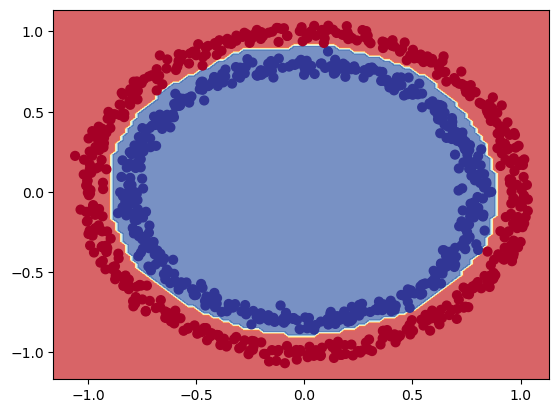

In [37]:
plot_Dec_boundry(model=model_3, X=X, y=y)

# Evaluating and improving our classification

so far we have been training and testing on the same dataset...

However, in machine learning this is basically a sin.

so lets create a training and test set.

In [40]:
len(X)

1000

In [41]:
# split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape,X_test.shape,y_train.shape,y_test.shape,

((800, 2), (200, 2), (800,), (200,))

In [42]:
# Lets recreate a model to fit on the training data and evaluate on the testing data
tf.random.set_seed(42)

model_4 = Sequential()

model_4.add(Dense(4, activation='relu'))
model_4.add(Dense(4, activation='relu'))
model_4.add(Dense(1, activation='sigmoid'))

model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])



history = model_4.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 548us/step - loss: 0.7160 - accuracy: 0.4975
Epoch 2/25
25/25 [==============================] - 0s 455us/step - loss: 0.6947 - accuracy: 0.4200
Epoch 3/25
25/25 [==============================] - 0s 792us/step - loss: 0.6874 - accuracy: 0.4850
Epoch 4/25
25/25 [==============================] - 0s 490us/step - loss: 0.6827 - accuracy: 0.5288
Epoch 5/25
25/25 [==============================] - 0s 534us/step - loss: 0.6772 - accuracy: 0.5537
Epoch 6/25
25/25 [==============================] - 0s 620us/step - loss: 0.6696 - accuracy: 0.5562
Epoch 7/25
25/25 [==============================] - 0s 568us/step - loss: 0.6555 - accuracy: 0.5925
Epoch 8/25
25/25 [==============================] - 0s 464us/step - loss: 0.6330 - accuracy: 0.6525
Epoch 9/25
25/25 [==============================] - 0s 531us/step - loss: 0.6047 - accuracy: 0.7013
Epoch 10/25
25/25 [==============================] - 0s 490us/step - loss: 0.5639 - accuracy: 0.7325

In [43]:
model_4.evaluate(X_test, y_test)

7/7 [==============================] - 0s 563us/step - loss: 0.0867 - accuracy: 0.9950


[0.08671212196350098, 0.9950000047683716]

313/313 [==============================] - 0s 240us/step
doing binary classification
313/313 [==============================] - 0s 224us/step
doing binary classification


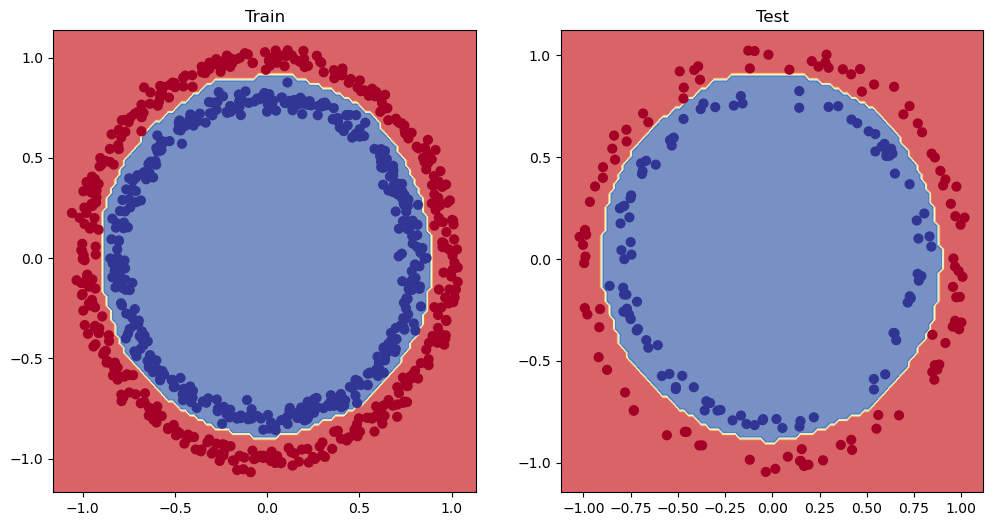

In [45]:
# plot the decision boundry
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_Dec_boundry(model=model_3, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_Dec_boundry(model=model_3, X=X_test, y=y_test)
plt.show();

Text(0.5, 1.0, 'Model 4 loss curves')

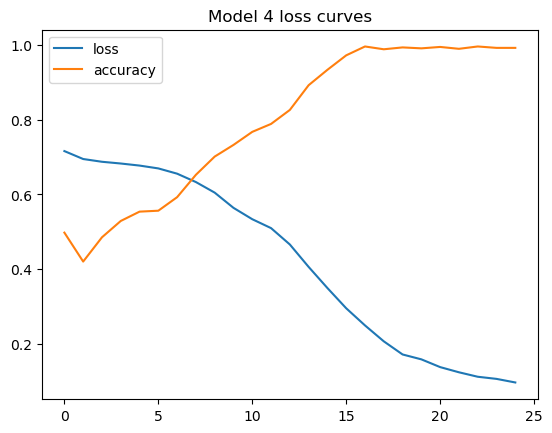

In [46]:
pd.DataFrame(history.history).plot()
plt.title('Model 4 loss curves')

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we are going to use the following steps:
* A lerning arte **callback** - you can think of call back as an extra piece of functionality, you can add to your *while* its training. 
* Another model (we could use the same one as above, but we are practicing building model here)
* A modified loss curves plot.

In [48]:
tf.random.set_seed(42)

model_5 = Sequential()

model_5.add(Dense(2, activation='relu'))
model_5.add(Dense(4, activation='relu'))
model_5.add(Dense(4, activation='relu'))
model_5.add(Dense(1, activation='sigmoid'))

model_5.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 100**(epoch/20))


history2 = model_5.fit(X_train, y_train, callbacks=[lr_schedule], epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 686us/step - loss: 0.6925 - accuracy: 0.5063 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 563us/step - loss: 0.6920 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 3/100
25/25 [==============================] - 0s 653us/step - loss: 0.6915 - accuracy: 0.5025 - lr: 1.5849e-04
Epoch 4/100
25/25 [==============================] - 0s 635us/step - loss: 0.6909 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 5/100
25/25 [==============================] - 0s 660us/step - loss: 0.6904 - accuracy: 0.5100 - lr: 2.5119e-04
Epoch 6/100
25/25 [==============================] - 0s 700us/step - loss: 0.6897 - accuracy: 0.5113 - lr: 3.1623e-04
Epoch 7/100
25/25 [==============================] - 0s 687us/step - loss: 0.6891 - accuracy: 0.5075 - lr: 3.9811e-04
Epoch 8/100
25/25 [==============================] - 0s 612us/step - loss: 0.6885 - accuracy: 0.5050 - lr: 5.0119e-04
Epoch 9/100
25/25 [==============================] - 0s 

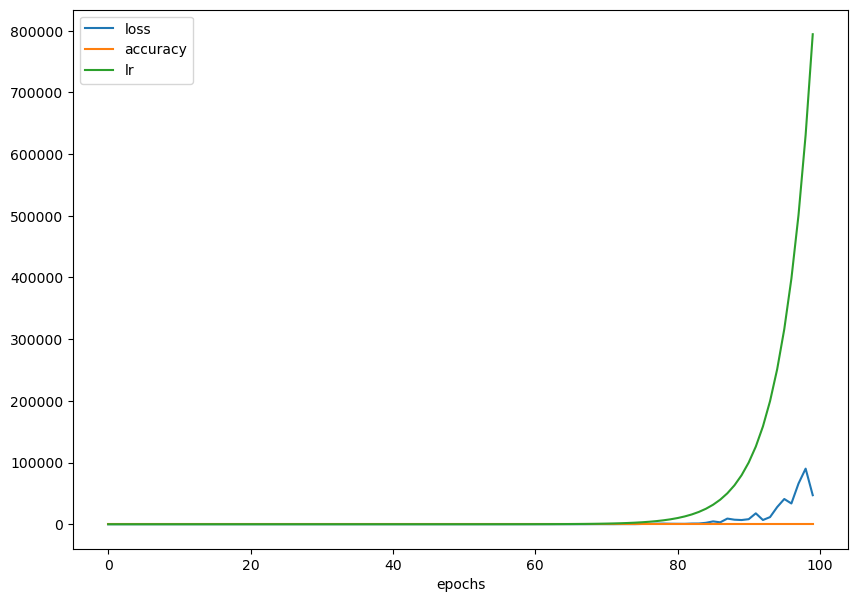

In [49]:
pd.DataFrame(history2.history).plot(figsize=(10,7), xlabel="epochs");

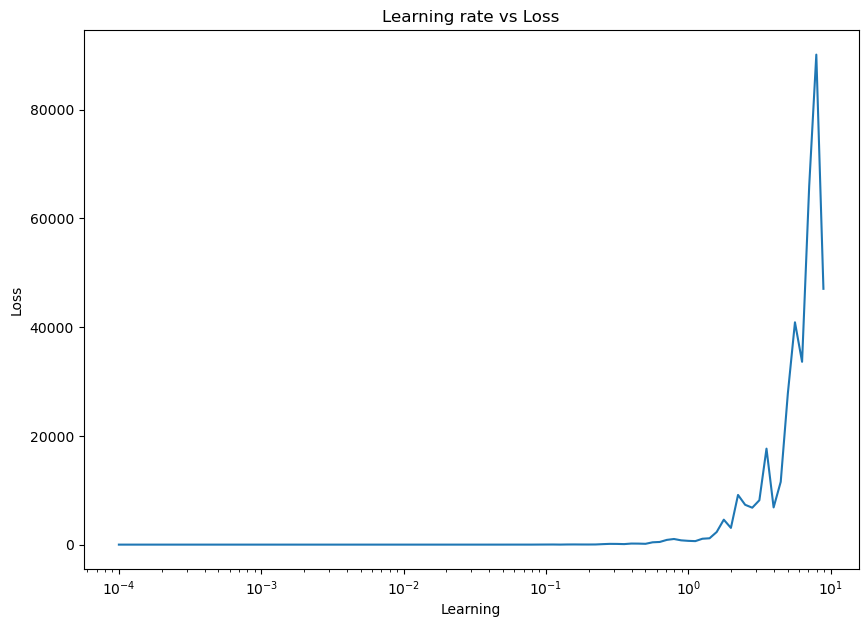

In [51]:
lrs  =1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history2.history['loss'])
plt.xlabel('Learning')
plt.ylabel('Loss')
plt.title('Learning rate vs Loss');

In [52]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [56]:
tf.random.set_seed(42)

model_6 = Sequential()


model_6.add(Dense(4, activation='relu'))
model_6.add(Dense(4, activation='relu'))
model_6.add(Dense(1, activation='sigmoid'))

model_6.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 100**(epoch/20))


history3 = model_6.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 645us/step - loss: 0.6908 - accuracy: 0.5325
Epoch 2/25
25/25 [==============================] - 0s 573us/step - loss: 0.6851 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 567us/step - loss: 0.6718 - accuracy: 0.5813
Epoch 4/25
25/25 [==============================] - 0s 569us/step - loss: 0.6590 - accuracy: 0.5788
Epoch 5/25
25/25 [==============================] - 0s 526us/step - loss: 0.6494 - accuracy: 0.6075
Epoch 6/25
25/25 [==============================] - 0s 531us/step - loss: 0.6226 - accuracy: 0.6363
Epoch 7/25
25/25 [==============================] - 0s 562us/step - loss: 0.5721 - accuracy: 0.7525
Epoch 8/25
25/25 [==============================] - 0s 533us/step - loss: 0.4321 - accuracy: 0.8700
Epoch 9/25
25/25 [==============================] - 0s 525us/step - loss: 0.2901 - accuracy: 0.9625
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.1911 - accuracy: 0.9850
E

In [57]:
model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 527us/step - loss: 0.0310 - accuracy: 0.9900


[0.030984940007328987, 0.9900000095367432]

In [58]:
model_4.evaluate(X_test, y_test)

7/7 [==============================] - 0s 507us/step - loss: 0.0867 - accuracy: 0.9950


[0.08671212196350098, 0.9950000047683716]

## More classification evaluation methods
Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation method & metrics you should be familir with:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [61]:
loss, accuracy = model_6.evaluate(X_test, y_test)
print(f"Model loss on the test set:{(loss):.2f}")
print(f"Model accuracy on the test set:{(accuracy*100):.2f}%")

7/7 [==============================] - 0s 705us/step - loss: 0.0310 - accuracy: 0.9900
Model loss on the test set:0.03
Model accuracy on the test set:99.00%


## How about a confusion matrix?

In [66]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix

# make predictions
y_pred_4 = model_6.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_pred_4)

7/7 [==============================] - 0s 495us/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [67]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [69]:
y_pred_4[:10]

array([[0.9996601 ],
       [0.99982005],
       [0.99917793],
       [0.99926436],
       [0.00741784],
       [0.00337734],
       [0.972483  ],
       [0.00153762],
       [0.99846196],
       [0.02612315]], dtype=float32)

oops.. looks like our predictions array has come out in **prediction probability** from... the standart output from the sigmoid (or softmax) activation function.

In [71]:
tf.round(y_pred_4)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [72]:
confusion_matrix(y_test, tf.round(y_pred_4))

array([[100,   1],
       [  1,  98]])

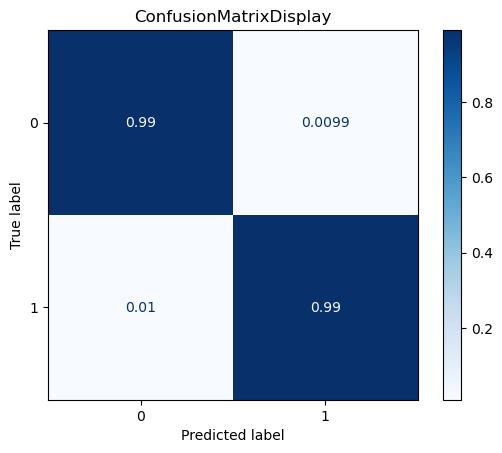

In [107]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, tf.round(y_pred_4),cmap='Blues', normalize='true')
plt.title("ConfusionMatrixDisplay");

## Working with larger example (multicalss classification)

When you have more than two classes as an option, its known as **multi-class calssification**
* This means if you have 3 diffrent class its multi-class calssification
* its also means if you have 100 difrent classes, its multi-class calssification.

To practise multi-class calssification, we are going to build a neural network to classify images of diffrent items of clothing.

In [108]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels)  = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [110]:
print(f"Train data:\n{train_data[0]}\n")
print(f"Train label:\n{train_labels[0]}\n")

Train data:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   

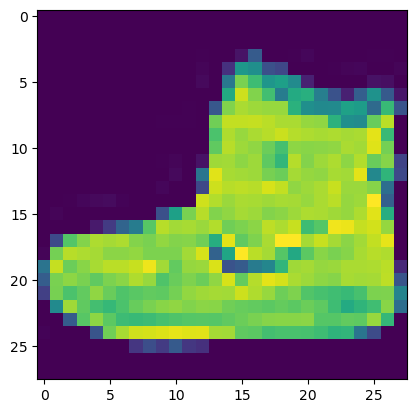

In [111]:
plt.imshow(train_data[0]);